In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import nltk


In [4]:
import re
from nltk.corpus  import wordnet
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [5]:
df = pd.read_csv("WELFake_Dataset.csv", encoding="latin1",usecols=["title","text","label"])
df_0=df[df["label"]==0].sample(5000)
df_1=df[df["label"]==1].sample(5000)


C:\Users\zas\AppData\Local\Temp\ipykernel_13824\1975891199.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("WELFake_Dataset.csv", encoding="latin1",usecols=["title","text","label"])


In [6]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [7]:
data=pd.concat([df_0,df_1])
data.head()

,title,text,label
14564,Kenya police disperse protesters as Odinga tem...,NAIROBI (Reuters) - Kenyan police fired tearga...,0
54022,Lebanon's Hezbollah denies sending weapons to ...,BEIRUT (Reuters) - The leader of Lebanon s Hez...,0
74224,Catalan leader backs mediation to resolve regi...,BARCELONA (Reuters) - Catalan regional leader ...,0
74500,The New York Times Pushes Another Phony Labor ...,"Another day, another phony labor shortage. [Th...",0
63341,"EU and Iran defend nuclear deal, under fire fr...","SAMARKAND, Uzbekistan (Reuters) - Senior offic...",0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14564 to 17430
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9932 non-null   object
 1   text    9995 non-null   object
 2   label   10000 non-null  object
dtypes: object(3)
memory usage: 312.5+ KB


In [9]:
data.dtypes

title    object
text     object
label    object
dtype: object

In [10]:
data.isna().sum()

title    68
text      5
label     0
dtype: int64

In [11]:
len(data.columns)

3

In [12]:
data.dropna(inplace=True)
data.isna().sum()

title    0
text     0
label    0
dtype: int64

In [13]:
data.reset_index(inplace=True)
data.head()

,index,title,text,label
0,14564,Kenya police disperse protesters as Odinga tem...,NAIROBI (Reuters) - Kenyan police fired tearga...,0
1,54022,Lebanon's Hezbollah denies sending weapons to ...,BEIRUT (Reuters) - The leader of Lebanon s Hez...,0
2,74224,Catalan leader backs mediation to resolve regi...,BARCELONA (Reuters) - Catalan regional leader ...,0
3,74500,The New York Times Pushes Another Phony Labor ...,"Another day, another phony labor shortage. [Th...",0
4,63341,"EU and Iran defend nuclear deal, under fire fr...","SAMARKAND, Uzbekistan (Reuters) - Senior offic...",0.0


In [14]:
data.shape

(9927, 4)

In [15]:
X=data.drop("label",axis=1)
y=data.label

In [16]:
y.head()

0      0
1      0
2      0
3      0
4    0.0
Name: label, dtype: object

In [17]:
messages = X.copy()

In [18]:
messages.head()

,index,title,text
0,14564,Kenya police disperse protesters as Odinga tem...,NAIROBI (Reuters) - Kenyan police fired tearga...
1,54022,Lebanon's Hezbollah denies sending weapons to ...,BEIRUT (Reuters) - The leader of Lebanon s Hez...
2,74224,Catalan leader backs mediation to resolve regi...,BARCELONA (Reuters) - Catalan regional leader ...
3,74500,The New York Times Pushes Another Phony Labor ...,"Another day, another phony labor shortage. [Th..."
4,63341,"EU and Iran defend nuclear deal, under fire fr...","SAMARKAND, Uzbekistan (Reuters) - Senior offic..."


In [19]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
ps=PorterStemmer()
lm=WordNetLemmatizer()
corpus=[]
for  var in range(len(messages)):
   review=re.sub("[^a-zA-Z0_9]"," ",messages["text"][var])
   review=review.lower()
   review=review.split()
   review=[lm.lemmatize(x) for x in review if  x not in  stopwords.words("english")]
   review=" ".join(review)
   corpus.append(review)

In [20]:
corpus[0:5]

['nairobi reuters kenyan police fired teargas shot air scatter small number demonstrator nairobi two day election main opposition leader appeared pull back call protest vote western city kisumu around 000 demonstrator marched election board office witness said heeding raila odinga appeal protest thursday repeat presidential ballot dispersing peacefully odinga boycotting contest incumbent uhuru kenyatta say free fair election board made insufficient progress towards reform demanded original election held august annulled odinga urged supporter ensure new vote take place repeatedly saying would election tuesday told bbc calling protest election day told people protest polling day said told people stay away said radio interview called clarification odinga spokesman said saying peaceful protest would still take place opposition would fully explain plan wednesday least 9 people died political violence since august ballot evoking unwelcome memory aftermath disputed 00 vote 00 people killed tu

In [21]:
print(sum(len(var.split())for var in corpus))

3047177


In [22]:
print(max(len(var.split()) for var in corpus))

3201


In [23]:
len(corpus)

9927

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=8000)
x=tfidf.fit_transform(corpus).toarray()


In [25]:
y = data["label"]
y=y.astype(np.int32())
y.dtype


dtype('int32')

In [26]:
y.isna().sum()

0

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
# y_train.isna().sum()
# y_train.dtype

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

RandomForestClassifier
              precision    recall  f1-score   support

           0     0.9043    0.8999    0.9021      1019
           1     0.8951    0.8997    0.8974       967

    accuracy                         0.8998      1986
   macro avg     0.8997    0.8998    0.8997      1986
weighted avg     0.8998    0.8998    0.8998      1986



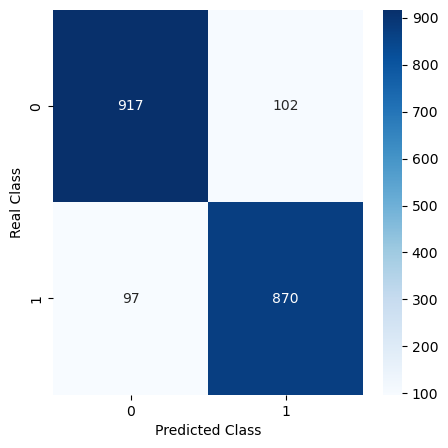

In [30]:
y_pred_rfc=rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
print("RandomForestClassifier")
print(classification_report(y_test,y_pred_rfc,digits=4))
cm=confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()



In [31]:
from sklearn.naive_bayes import MultinomialNB
mtnb=MultinomialNB()
mtnb.fit(X_train,y_train)


MultinomialNB()

MultinomialNB
              precision    recall  f1-score   support

           0     0.9043    0.8999    0.9021      1019
           1     0.8951    0.8997    0.8974       967

    accuracy                         0.8998      1986
   macro avg     0.8997    0.8998    0.8997      1986
weighted avg     0.8998    0.8998    0.8998      1986



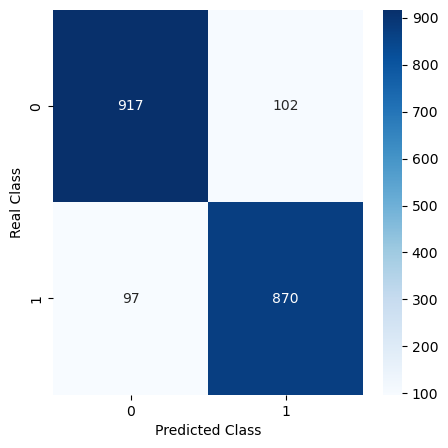

In [32]:
y_pred_mtnb=rfc.predict(X_test)

print("MultinomialNB")
print(classification_report(y_test,y_pred_mtnb,digits=4))
cm=confusion_matrix(y_test,y_pred_mtnb)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

logistic_regression=LogisticRegression()
svm=SVC()
sgdclassifier=SGDClassifier()
dtc=DecisionTreeClassifier()
xgboost=XGBClassifier()
gradient_boosting = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score

logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
sgdclassifier.fit(X_train, y_train)
dtc.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

models=[logistic_regression,svm,sgdclassifier,dtc,xgboost,gradient_boosting,adaboost,mtnb]
models_names=["Logistic Regression","SVC","SGD Classifier","Decision Tree Classifier","XG Boosting Classifier",
              "Gradient Boosting Classifier","Ada Boost Classifier","MultinomialNB"]
for name,model  in zip(models_names,models):
  print(f"----------{name}-------")
  print(f" accuracy_score  {accuracy_score(y_test,model.predict(X_test))}")
  print(f" precision_score  {precision_score(y_test,model.predict(X_test))}")
  print(f" recall_score  {recall_score(y_test,model.predict(X_test))}")
  print(f" f1_score  {f1_score(y_test,model.predict(X_test))}")
  print("\n")






----------Logistic Regression-------
 accuracy_score  0.9113796576032226
 precision_score  0.9073120494335737
 recall_score  0.9110651499482937
 f1_score  0.9091847265221878


----------SVC-------
 accuracy_score  0.9179254783484391
 precision_score  0.9135802469135802
 recall_score  0.9183040330920372
 f1_score  0.9159360495100567


----------SGD Classifier-------
 accuracy_score  0.9244712990936556
 precision_score  0.9286463798530955
 recall_score  0.9152016546018614
 f1_score  0.9218749999999999


----------Decision Tree Classifier-------
 accuracy_score  0.8746223564954683
 precision_score  0.8685831622176592
 recall_score  0.8748707342295761
 f1_score  0.8717156105100464


----------XG Boosting Classifier-------
 accuracy_score  0.9400805639476334
 precision_score  0.9308943089430894
 recall_score  0.9472595656670114
 f1_score  0.93900563813429


----------Gradient Boosting Classifier-------
 accuracy_score  0.9219536757301108
 precision_score  0.9027777777777778
 recall_score  0

In [34]:
ensemble=VotingClassifier(estimators=[
            ("svm",svm),("dtc",dtc),("logistic_regression",logistic_regression),
            ("sgdclassifier",sgdclassifier),("adaboost",adaboost),("xgboost",xgboost),("gradient_boosting",gradient_boosting),("MultinomialNB",mtnb)
],voting="hard")
ensemble.fit(X_train,y_train)


VotingClassifier(estimators=[('svm', SVC()), ('dtc', DecisionTreeClassifier()),
                             ('logistic_regression', LogisticRegression()),
                             ('sgdclassifier', SGDClassifier()),
                             ('adaboost', AdaBoostClassifier()),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stoppin...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_

--- Ensemble (Voting Classifier) ---
Accuracy: 0.93202416918429
Precision: 0.9342379958246346
Recall: 0.9255429162357808
F1 Score: 0.9298701298701298
              precision    recall  f1-score   support

           0     0.9300    0.9382    0.9340      1019
           1     0.9342    0.9255    0.9299       967

    accuracy                         0.9320      1986
   macro avg     0.9321    0.9319    0.9320      1986
weighted avg     0.9320    0.9320    0.9320      1986



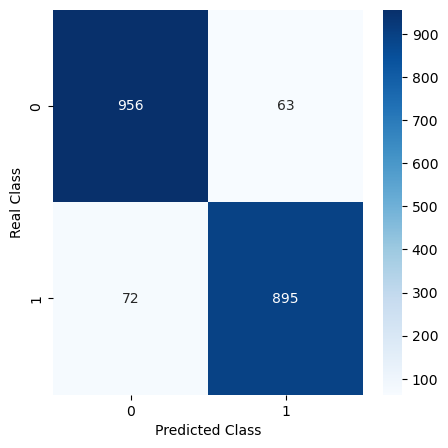

In [35]:
y_pred_ensemble = ensemble.predict(X_test)

print("--- Ensemble (Voting Classifier) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble))
print("Recall:", recall_score(y_test, y_pred_ensemble))
print("F1 Score:", f1_score(y_test, y_pred_ensemble))

print(classification_report(y_test,y_pred_ensemble,digits=4))
cm=confusion_matrix(y_test,y_pred_ensemble)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [36]:
from sklearn.ensemble import StackingClassifier

models_level_0=[
            ("svm",svm),("dtc",dtc),("logistic_regression",logistic_regression),
            ("sgdclassifier",sgdclassifier),("adaboost",adaboost),("xgboost",xgboost),("gradient_boosting",gradient_boosting)
            ,("mtnb",mtnb)
]
final_level=SVC()
stacking_classifier=StackingClassifier(
            estimators=models_level_0,
            final_estimator=final_level,
            n_jobs=-1,
           
)
stacking_classifier.fit(X_train,y_train)


StackingClassifier(estimators=[('svm', SVC()),
                               ('dtc', DecisionTreeClassifier()),
                               ('logistic_regression', LogisticRegression()),
                               ('sgdclassifier', SGDClassifier()),
                               ('adaboost', AdaBoostClassifier()),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopp...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                         

--- Stacking Classifier ---
Accuracy: 0.9441087613293051
Precision: 0.9376278118609407
Recall: 0.9482936918304034
F1 Score: 0.9429305912596402
              precision    recall  f1-score   support

           0     0.9504    0.9401    0.9452      1019
           1     0.9376    0.9483    0.9429       967

    accuracy                         0.9441      1986
   macro avg     0.9440    0.9442    0.9441      1986
weighted avg     0.9442    0.9441    0.9441      1986



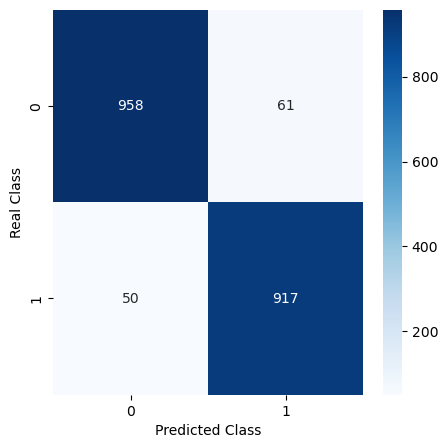

In [37]:
y_pred_stacking = stacking_classifier.predict(X_test)
print("--- Stacking Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking))
print("Recall:", recall_score(y_test, y_pred_stacking))
print("F1 Score:", f1_score(y_test, y_pred_stacking))
print(classification_report(y_test,y_pred_stacking,digits=4))
cm=confusion_matrix(y_test,y_pred_stacking)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()